In [2]:
import numpy as np
import matplotlib.pyplot as plt
import math
import matplotlib.animation as animation
from mpl_toolkits.mplot3d import Axes3D
import random

# A Penning Trap Simulation

Here we adapt our previous simulation to consider a particle in a penning trap. This involes introducing a penning trap electric field which has the form:

\begin{align}
     E &= A \cdot \begin{bmatrix}
           2x \\
           2y \\
           -4z
         \end{bmatrix}
\end{align}


In [3]:
class ChargedParticle:
    def __init__(self, mass, charge, postion, velocity):
        self.m = mass
        self.q = charge
        self.r = np.array(postion)
        self.v = np.array(velocity)
    
    #method for finding the electric feild of at particle location in the penning trap electric feild
    def Penning_E_field(self, V_0):
        return(V_0*np.array([2*self.r[0], 2*self.r[1], -4*self.r[2]]))
    
    #method calculating rotating wall electric feild of magnitude E and rotational freqeuncy w at time t. 
    def RW_field(self, E, t, w):
        return(np.array([E*math.cos(w*t), -E*math.sin(w*t), 0]))
        
    def v_r_step(self, dt, E, B):
        # Boris Algorithm
        v_minus = (dt*self.q*E)/(2*self.m) + self.v
        c = (dt*self.q)/(2*self.m)
        
        #solve for v_plus through system of linear equations
        a = np.array([[1, -c*B[2], c*B[1]],[c*B[2], 1, -c*B[0]], [-c*B[1], c*B[0], 1]])
        b = c * np.cross(v_minus, B) + v_minus
        v_plus =np.linalg.solve(a, b)
        
        v_new = v_plus + (dt*self.q*E)/(2*self.m)
        # END OF METHOD

        #Step and replace position and velocity
        r_new = self.r + v_new*dt
        self.v = np.array(v_new)
        self.r = np.array(r_new)
            

In [4]:
## Initialise particle properties
q = 1
m = 1

#Initialise B field
B=np.array([0, 0, 5])

#create particle
particle = ChargedParticle(m, q, [1, 1, 1], [0.001 ,0, 0])

In [15]:
#iterate through steps0
T=0
V=[]
R=[]
dt=.005
time=[]
V__0=1

om_z = np.sqrt(4*q*V__0/m)
om_c = q*B[2]/m
om_c_p = om_c/2 + np.sqrt(om_c**2/4 - om_z**2/2) 

#lets iterate through time expose our particle to E and B
while T<100:
    time.append(T)

    E = particle.Penning_E_field(V__0)  + particle.RW_field(1, T, 1.2/1.25) #extra rotating wall electric feild
    particle.v_r_step(dt, E, B)
        
    R.append(particle.r)
    V.append(particle.v)
    T=T+dt

In [16]:
R1=np.transpose(np.array(R))
V1=np.transpose(np.array(V))

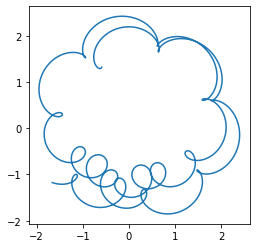

In [22]:
plt.plot(R1[0][15000:], R1[1][15000:])
plt.gca().set_aspect('equal')
plt.show()

We get the  $epitrochoidal$ shape drawn out in the $(x, y)$ dimensions of a penning trap. However, the impact of the rotating wall is not particularly easy to understand.

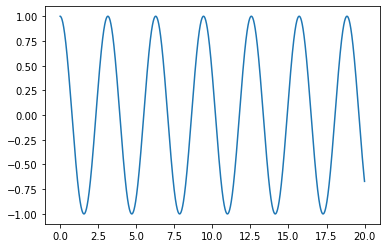

In [11]:
plt.plot(time, R[2])
plt.show()

Nice.